## Анализ датасета по добыче нефти

использованы данные хакатона по Прогнозированию показателей работы скважин в нефтегазовой отрасли

In [ ]:
# импортируем библиотеки

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
import seaborn as sns

In [3]:
# импортируем файл
train = pd.read_csv('D:\Irene\Хакатон/train.csv')
train

,datetime,Номер скважины,Дебит нефти,Давление забойное,x,y,Объем жидкости,Объем нефти,Активная мощность (ТМ),Время работы (ТМ),Газовый фактор рабочий (ТМ),Давление буферное,Давление забойное от Hд,Давление забойное от Pпр,Давление линейное (ТМ),Давление на входе ЭЦН (ТМ),Дебит газа (ТМ),Дебит газа попутного,Дебит жидкости (ТМ),Коэффициент мощности (ТМ)
0,1990-08-01,0,19.939,NaN,18670.86,5714.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-08-02,0,19.939,39.064454,18670.86,5714.86,NaN,NaN,50.851351,9.600833,NaN,NaN,33.913336,39.064454,1.887872,30.293676,3843.746667,24.25,24.250000,98.534314
2,1990-08-03,0,21.172,39.064487,18670.86,5714.86,NaN,NaN,52.353846,NaN,NaN,NaN,33.806090,39.064487,1.885714,30.261774,3900.955000,25.75,25.833333,99.139785
3,1990-08-04,0,22.529,38.965297,18670.86,5714.86,NaN,NaN,51.242424,9.600000,NaN,NaN,33.695717,38.965297,1.875851,30.212768,3874.505000,27.40,27.933333,98.744318
4,1990-08-05,0,22.529,38.766822,18670.86,5714.86,NaN,NaN,50.910256,9.563889,NaN,NaN,33.695717,38.766822,1.873163,30.109119,3853.696667,27.40,27.400000,98.419689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67131,1992-04-07,105,7.646,122.180672,14230.22,22456.04,NaN,NaN,252.298969,24.000000,NaN,NaN,122.180672,99.535735,11.548286,20.536082,NaN,451.36,451.358333,72.876289
67132,1992-04-08,105,7.639,122.182381,14230.22,22456.04,15472.802,161.526,251.647423,24.000000,NaN,NaN,122.182381,99.202518,11.556784,20.459184,NaN,450.97,450.972727,72.855670
67133,1992-04-09,105,7.657,122.183551,14230.22,22456.04,NaN,NaN,251.713542,24.000000,NaN,13.0,122.183551,99.119048,11.583542,20.104167,NaN,452.03,452.027273,72.302083
67134,1992-04-10,105,7.654,122.180372,14230.22,22456.04,NaN,NaN,251.504167,24.000000,NaN,NaN,122.180372,98.744075,11.601396,20.052083,NaN,451.85,451.850000,72.041667


In [4]:
# посмотрим на тип данных и пропущеные значения

train.info() # интересующий нас столбец "Дебит нефти" пропущенных значений не имеет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67136 entries, 0 to 67135
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   datetime                     67136 non-null  object 
 1   Номер скважины               67136 non-null  int64  
 2   Дебит нефти                  67136 non-null  float64
 3   Давление забойное            64756 non-null  float64
 4   x                            67136 non-null  float64
 5   y                            67136 non-null  float64
 6   Объем жидкости               3465 non-null   float64
 7   Объем нефти                  3465 non-null   float64
 8   Активная мощность (ТМ)       62412 non-null  float64
 9   Время работы (ТМ)            63475 non-null  float64
 10  Газовый фактор рабочий (ТМ)  25230 non-null  float64
 11  Давление буферное            10208 non-null  float64
 12  Давление забойное от Hд      65710 non-null  float64
 13  Давление забойно

In [5]:
# удалим дублирующие строки 
train = train.drop_duplicates()

In [6]:
# было - 67136 rows × 20 columns;   стало - 66545 rows × 20 columns
train.shape

(66545, 20)

In [7]:
# оставим часть столбцов 
df = train[['datetime', 'Номер скважины', 'Дебит нефти']]
df.head()

,datetime,Номер скважины,Дебит нефти
0,1990-08-01,0,19.939
1,1990-08-02,0,19.939
2,1990-08-03,0,21.172
3,1990-08-04,0,22.529
4,1990-08-05,0,22.529


In [8]:
# переименуем для удобства работы
df = df.rename(columns={'Номер скважины': 'well_number', 'Дебит нефти': 'oil_profit'})
df.head()

,datetime,well_number,oil_profit
0,1990-08-01,0,19.939
1,1990-08-02,0,19.939
2,1990-08-03,0,21.172
3,1990-08-04,0,22.529
4,1990-08-05,0,22.529


In [9]:
# приводим тип данных столбца datetime к типу datetime

df['datetime'] = pd.to_datetime(df['datetime'])
df.dtypes

datetime       datetime64[ns]
well_number             int64
oil_profit            float64
dtype: object

In [26]:
# посмотрим на колонку дата
df['datetime'].describe()

# видим данные с 01.08.1990 по 26.04.1992

<ipython-input-26-dd44a55f9c55>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['datetime'].describe()


count                   66545
unique                    635
top       1990-09-08 00:00:00
freq                      137
first     1990-08-01 00:00:00
last      1992-04-26 00:00:00
Name: datetime, dtype: object

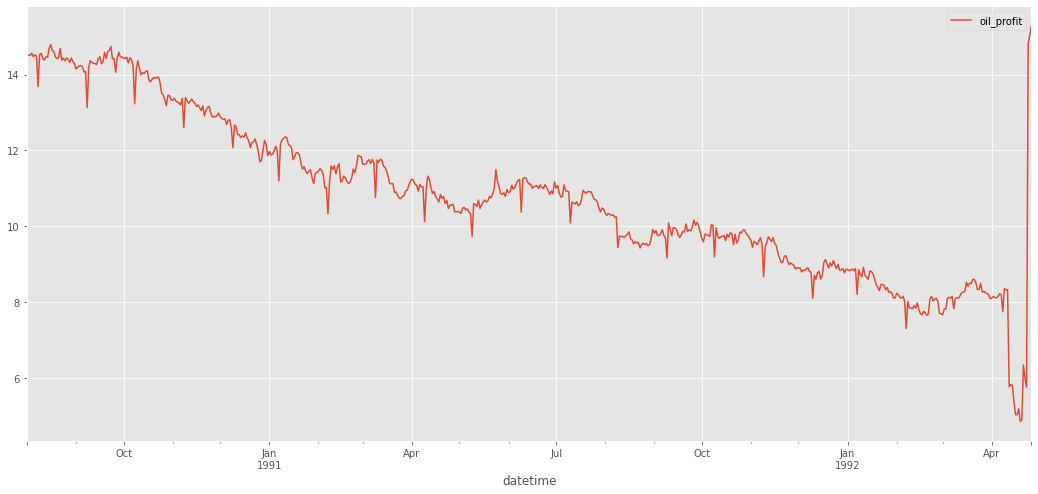

In [10]:
# посмотрим всреднем на добычу по всем скважинам. Наблюдаем общий тренд на снижение и резкое увеличение добычи на конец периода

df_mean = df.groupby(['datetime']) \
    .agg({'oil_profit': 'mean'}).plot(figsize=(18, 8))

In [12]:
# посмотрим на описательные статистики колонки "дебет нефти"
df['oil_profit'].describe()

# видим максимальное значение 79,977

count    66545.000000
mean        10.840686
std          8.913123
min          0.003000
25%          4.666000
50%          8.868333
75%         14.179000
max         79.977000
Name: oil_profit, dtype: float64

In [13]:
# сгруппируем по дням и скважинам

df_by_well = df.groupby(['datetime', 'well_number'], as_index=False) \
    .agg({'oil_profit': 'sum'})
df_by_well.head()

,datetime,well_number,oil_profit
0,1990-08-01,0,19.939
1,1990-08-01,1,10.999
2,1990-08-01,2,33.367
3,1990-08-01,3,33.224
4,1990-08-01,4,14.800


In [14]:
# применим пайвот чтобы визуализиолвать скважины на одном графике

df_by_well = df_by_well.pivot(index='datetime', columns='well_number', values='oil_profit')
df_by_well.head()

well_number,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
datetime,,,,,,,,,,,,,,,,,,,,,
1990-08-01,19.939,10.999,33.367,33.224,14.8,19.062,4.391,10.035,16.277,60.540,...,16.846,3.957,10.920,13.276,23.463,6.4505,2.993,29.6185,6.418,8.448
1990-08-02,19.939,10.999,33.367,33.224,14.8,19.062,4.391,10.035,16.277,60.540,...,16.846,3.957,10.920,13.276,23.463,6.4505,2.993,29.6185,6.418,8.448
1990-08-03,21.172,10.999,32.065,33.224,14.8,17.563,4.370,10.735,16.277,60.821,...,16.684,3.957,11.119,12.504,23.194,6.3020,2.853,28.5310,6.293,8.414
1990-08-04,22.529,22.485,33.367,33.224,14.8,18.455,4.398,10.608,16.277,60.356,...,16.464,4.105,10.880,11.848,23.170,6.1390,3.184,29.5180,6.267,8.411
1990-08-05,22.529,22.485,31.821,33.224,14.8,17.745,4.392,12.045,16.277,60.918,...,15.422,4.045,10.521,11.578,22.787,6.2690,3.392,28.4490,6.104,8.391


In [27]:
df_by_well.shape

(635, 106)

<AxesSubplot:xlabel='datetime'>

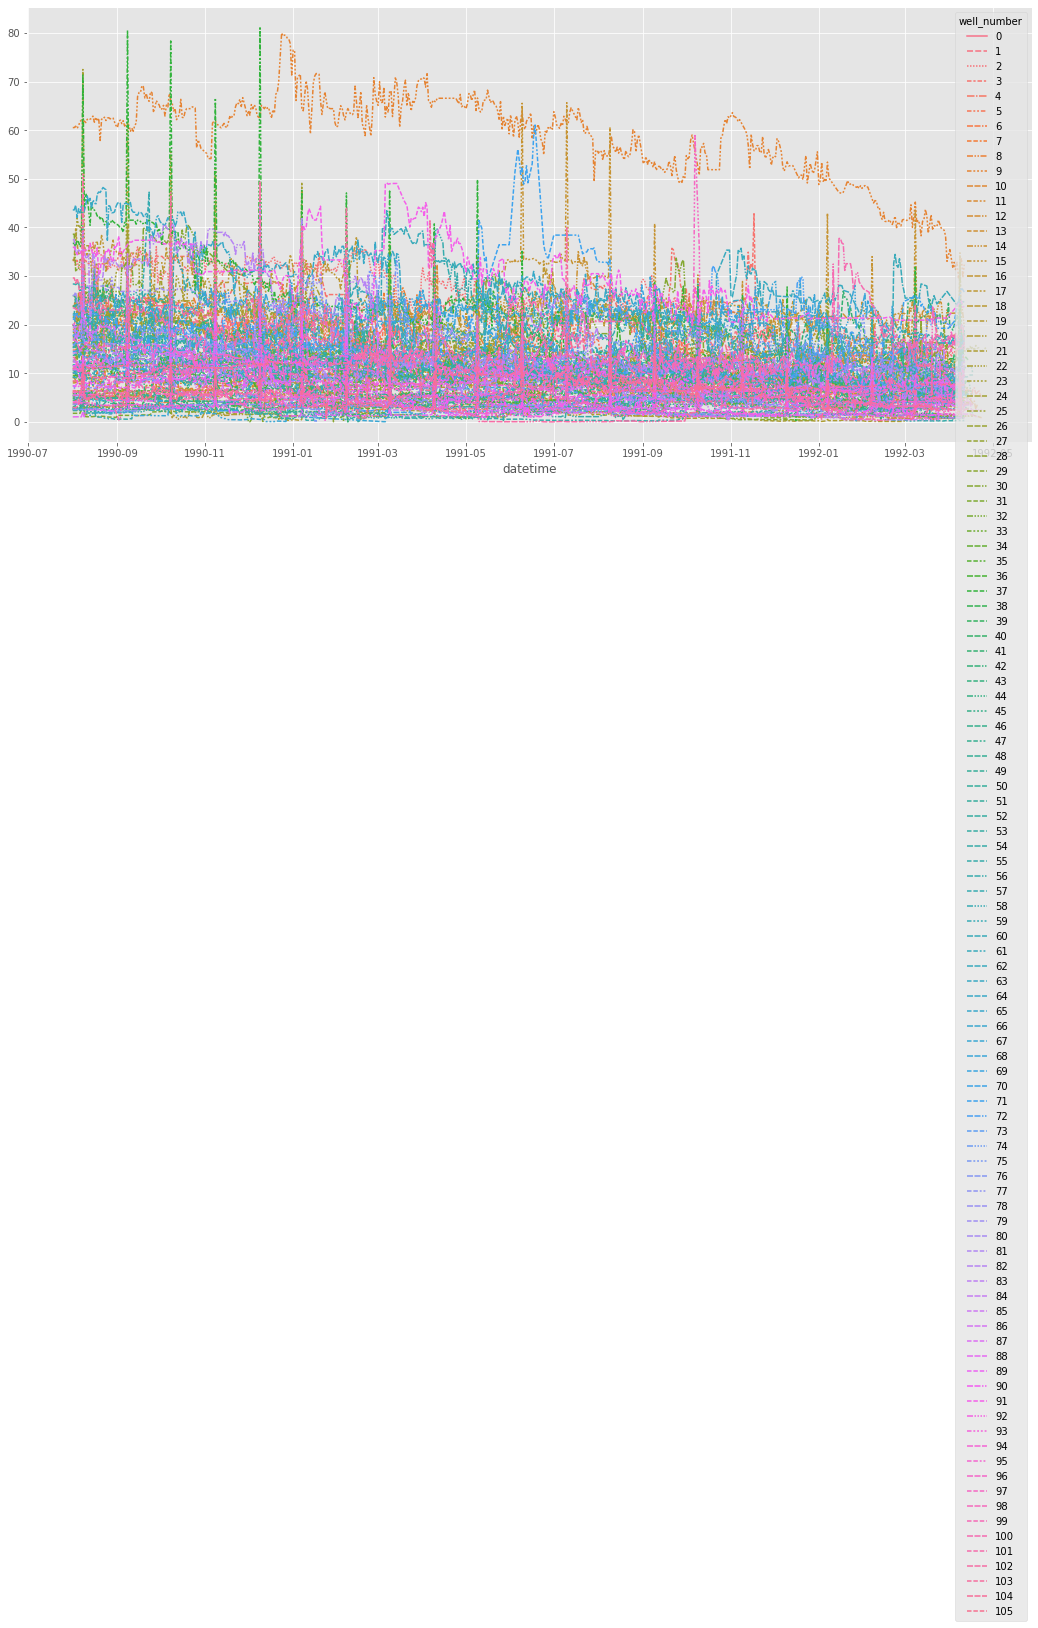

In [15]:
# попробуем визуализировать дебет нефти всех скважин на одном графике 
# не самая удачная визуализация!
# но можно увидеть, что одна из скважин имеет стабильно выше значение дебета нефти
# также видим часть скважин с выраженой сезонностью в виде периодических пиков значениями между ними близких к нулю

plt.figure(figsize=(18, 8))
sns.lineplot(data=df_by_well)

<AxesSubplot:xlabel='datetime'>

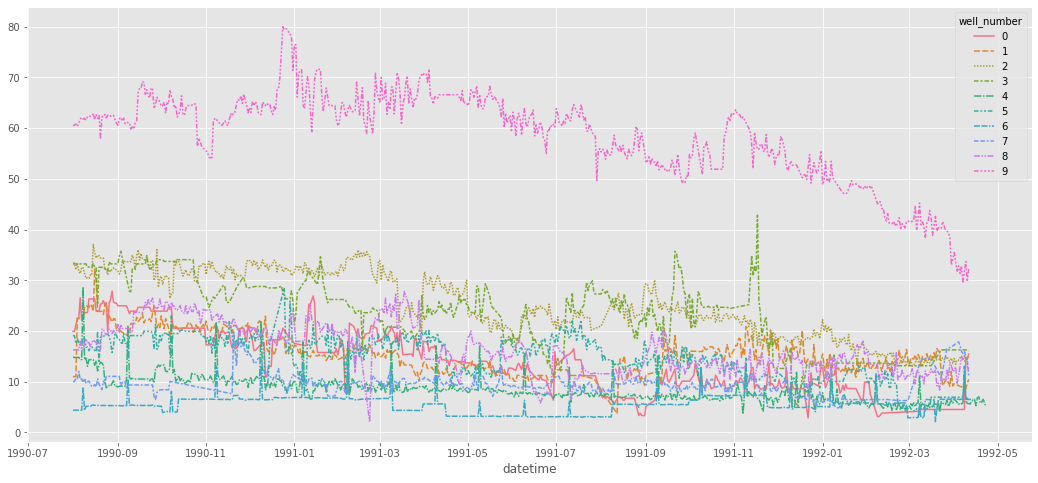

In [16]:
# посмотрим на первые 10 скважин
plt.figure(figsize=(18, 8))
sns.lineplot(data=df_by_well.iloc[:, 0:10])

# видим наибольшие обьемы дебета нефти приходит на скважину №9

In [18]:
# посмотрим на отсутствующие значения
# видим, что только 25-я скважина имеет данные по добыче за каждый день

df_by_well.isna().sum().sort_values()

well_number
25      0
92      3
4       3
12      3
90      6
       ..
40     15
39     15
38     15
34     15
105    15
Length: 106, dtype: int64

<AxesSubplot:xlabel='x', ylabel='y'>

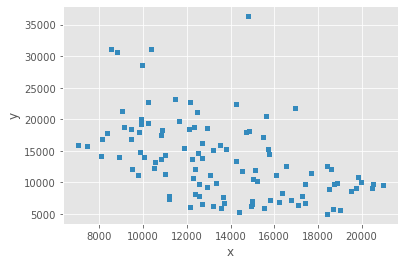

In [28]:
# посмотрим на расположение скважин
train.plot.scatter(x='x', y='y')

In [29]:
train.head()

,datetime,Номер скважины,Дебит нефти,Давление забойное,x,y,Объем жидкости,Объем нефти,Активная мощность (ТМ),Время работы (ТМ),Газовый фактор рабочий (ТМ),Давление буферное,Давление забойное от Hд,Давление забойное от Pпр,Давление линейное (ТМ),Давление на входе ЭЦН (ТМ),Дебит газа (ТМ),Дебит газа попутного,Дебит жидкости (ТМ),Коэффициент мощности (ТМ)
0,1990-08-01,0,19.939,NaN,18670.86,5714.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-08-02,0,19.939,39.064454,18670.86,5714.86,NaN,NaN,50.851351,9.600833,NaN,NaN,33.913336,39.064454,1.887872,30.293676,3843.746667,24.25,24.250000,98.534314
2,1990-08-03,0,21.172,39.064487,18670.86,5714.86,NaN,NaN,52.353846,NaN,NaN,NaN,33.806090,39.064487,1.885714,30.261774,3900.955000,25.75,25.833333,99.139785
3,1990-08-04,0,22.529,38.965297,18670.86,5714.86,NaN,NaN,51.242424,9.600000,NaN,NaN,33.695717,38.965297,1.875851,30.212768,3874.505000,27.40,27.933333,98.744318
4,1990-08-05,0,22.529,38.766822,18670.86,5714.86,NaN,NaN,50.910256,9.563889,NaN,NaN,33.695717,38.766822,1.873163,30.109119,3853.696667,27.40,27.400000,98.419689


In [32]:
# оставим в датасете координаты скважин
dataset = train[['Номер скважины', 'x', 'y']].drop_duplicates(subset=['Номер скважины'])
dataset

,Номер скважины,x,y
0,0,18670.86,5714.86
620,1,19964.69,10000.63
1240,2,20541.78,9806.47
1860,3,12578.90,7805.61
2480,4,9828.65,18016.98
...,...,...,...
63892,101,10224.10,22779.71
64560,102,13048.12,11237.06
65180,103,18886.91,9959.39
65848,104,19837.62,10793.40


In [42]:
dataset = dataset.rename(columns={'Номер скважины': 'well_number'})
dataset.head()

,well_number,x,y
0,0,18670.86,5714.86
620,1,19964.69,10000.63
1240,2,20541.78,9806.47
1860,3,12578.90,7805.61
2480,4,9828.65,18016.98


In [33]:
# сгруппируем по скважинам средний дебит нефти

dataset_by_well = df.groupby('well_number', as_index=False) \
    .agg({'oil_profit': 'mean'})
dataset_by_well.head()

,well_number,oil_profit
0,0,13.624356
1,1,15.308074
2,2,25.109704
3,3,23.253259
4,4,8.167270


In [48]:
# соединим датасеты для построения скаттерплота в зависимости от расположения скважины
dataset = dataset.join(dataset_by_well.set_index('well_number'), on='well_number')

Text(0.5, 1.05, 'Дебит нефти в среднем в зависимости от расположения скважины')

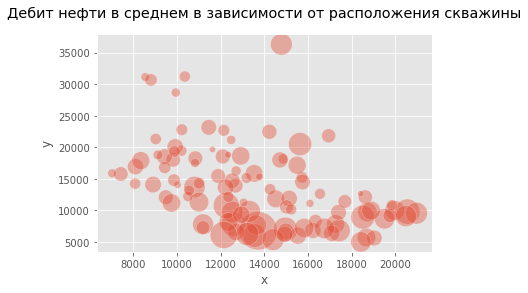

In [52]:
plt.scatter(dataset['x'], dataset['y'], s=dataset['oil_profit']*25, 
            alpha=0.4, edgecolors='w')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Дебит нефти в среднем в зависимости от расположения скважины',y=1.05)